In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
import warnings

warnings.filterwarnings("ignore")

In [2]:
def show(image: np.ndarray, title="Image", cmap_type="gray", axis=False):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    if not axis:
        plt.axis("off")
    plt.margins(0, 0)
    plt.show();

In [4]:
from skimage.io import imread

image = imread("./images/IMG_1478.jpeg")

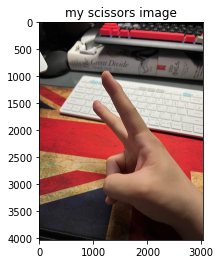

In [6]:
show(image, title="my scissors image", axis=True)

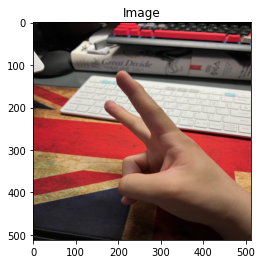

In [7]:
from skimage.transform import resize

image_512_512 = resize(image, output_shape = (512, 512))
show(image_512_512, axis=True)

In [8]:
from PIL import Image
im = Image.open('./images/IMG_1478.jpeg').convert('RGB')
im.save('./images/IMG_1478.png', 'png')

In [18]:
import pyheif

heif_file = pyheif.read('./images/IMG_1478.heic')
im = Image.frombytes(
    heif_file.mode,
    heif_file.size,
    heif_file.data,
    'raw',
    heif_file.mode,
    heif_file.stride,
)

print(type(im))

im = im.resize((512, 512))

im.save("sample_image.png", "PNG")

<class 'PIL.Image.Image'>


In [19]:
import os
import pyheif

def convert_images(images_path, output_path):
    """
        이미지들이 존재하는 경로, convert된 이미지가 저장될 경로를 입력하면
        확장자 변경, 이미지 크기 변경하여 저장.
    """
    for i, img_path in enumerate(os.listdir(images_path)):
        heif_file = pyheif.read(images_path + '/' + img_path)
        img = Image.frombytes(
            heif_file.mode,
            heif_file.size,
            heif_file.data,
            'raw',
            heif_file.mode,
            heif_file.stride,
        )
        img = img.resize((512, 512))
        converted_img_path = output_path + '/' + img_path.split(".")[0] + ".png"
        img.save(converted_img_path, "PNG")
        print(converted_img_path)
    print(len(os.listdir(images_path)), "개의 이미지. DONE")

In [20]:
convert_images('./images', './converted_images')

./converted_images/IMG_1478.png
1 개의 이미지. DONE
